<a href="https://colab.research.google.com/github/farhanzafrani/advanced-computer-vision-in-pytorch/blob/main/Introduction_to_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# For Understanding purpose we will be using simple ANN architecture to understand the fundamental concepts of Deep learning:
1. Activation Function
  1. sigmoid Function
  2. Linear Function
  3. Softmax Function
  4. tanh Function
  5. RelU function
2. Loss Functions
  1. Categorical Cross Entropy
  2. Binary Cross Entropy
  3. MSE (Mean Squared Error)
  4. MAE (Mean Absolute Error)

## Forward Propagation
## Chain Rule
## Backward Progpagation
## Stocastic Gradient Descent

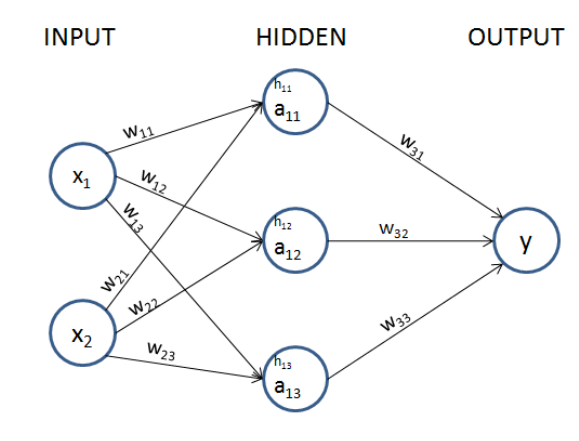

In [12]:
def string_line():
  print("="*50)

# Activation Function and Metrics

In [5]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

# Inputs and Outputs for the model
x = np.array([[1,1]])
y = np.array([[0]])

############### Activation Functions ###############
def sigmoid(value):
    return 1 / (1 + np.exp(-value))

def relu(value):
    return np.where(value > 0, value, 0)

def tanh(value):
    return (np.exp(value) - np.exp(-value)) / (np.exp(value) + np.exp(-value))

def softmax(value):
    exp_values = np.exp(value - np.max(value))  # for numerical stability
    return exp_values / np.sum(exp_values)

def linear(value):
    return value

################### Loss Functions #################

def mse(pred, out):
    return np.mean(np.square(pred - out))

def ase(pred, out):
    return np.mean(np.abs(pred - out))

def binary_cross_entropy(pred, out, epsilon=1e-12):
    pred = np.clip(pred, epsilon, 1. - epsilon)  # Avoid log(0)
    return -np.mean(out * np.log(pred) + (1 - out) * np.log(1 - pred))

def categorical_cross_entropy(pred, out, epsilon=1e-12):
    pred = np.clip(pred, epsilon, 1. - epsilon)  # Avoid log(0)
    return -np.mean(np.sum(out * np.log(pred)))


# Feed Forward Propagation

In [6]:
def feedforwardpropagation(inputs, output, weights):
    pre_hid = np.dot(inputs, weights[0]) + weights[1]
    a_act = sigmoid(pre_hid)  # Activation
    pred_out = np.dot(a_act, weights[2]) + weights[3]
    loss = mse(pred_out, output)

    return loss


# Backpropagation

In [7]:
def update_weights(inputs, outputs, weights, lr):
    temp_weights = deepcopy(weights)
    update_weights = deepcopy(weights)
    original_weights = deepcopy(weights)
    original_loss = feedforwardpropagation(inputs, outputs, weights)
    # Loop through each layer
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001  # Slightly perturb the weight
            _loss_plus = feedforwardpropagation(inputs, outputs, temp_weights)
            grad = (_loss_plus - original_loss)/0.0001
            update_weights[i][index] -= grad * lr
    return update_weights, original_loss

In [8]:
np.random.seed(42)

W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T,
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32),
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T,
    np.array([-0.5516], dtype=np.float32)
]

W_new = [
    np.random.randn(2, 3).astype(np.float32),
    np.random.randn(3,).astype(np.float32),
    np.random.randn(3,1).astype(np.float32),
    np.random.randn(1,).astype(np.float32)
]

[]

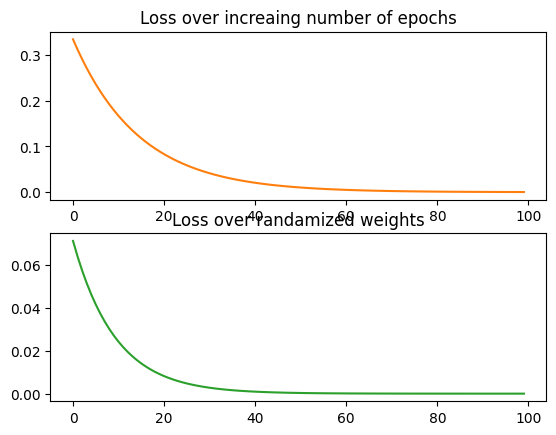

In [9]:
losses = []
losses_new = []
for epoch in range(100):
    W, loss = update_weights(x,y,W,0.01)
    W_new, loss_new = update_weights(x,y,W_new,0.01)
    losses.append(loss)
    losses_new.append(loss_new)

fig, ax = plt.subplots(2,1)
ax[0].set_title("Loss over increaing number of epochs")
ax[0].plot(losses, 'tab:orange')
ax[1].set_title("Loss over randamized weights")
ax[1].plot(losses_new, 'tab:green')

plt.plot()

In [13]:
# Testing

string_line()
print('Loss: '.upper())
loss = feedforwardpropagation(x,y,W)
print(loss)
string_line()
print("Weights: ".upper())
print([w for w in W])
string_line()
print("Updated Weights :".upper())
updated_weights, _ = update_weights(x, y, W, 0.001)
print([w for w in updated_weights])




LOSS: 
0.0003054840680033747
WEIGHTS: 
[array([[ 0.01424004, -0.5907864 , -0.27549535],
       [ 0.39883757, -0.52918637,  0.18640439]], dtype=float32), array([ 0.00554004,  0.5519136 , -0.06599568], dtype=float32), array([[ 0.3475135 ],
       [-0.05529078],
       [ 0.03760847]], dtype=float32), array([-0.22443289], dtype=float32)]
UPDATED WEIGHTS :
[array([[ 0.01424295, -0.5907868 , -0.27549502],
       [ 0.3988405 , -0.5291868 ,  0.18640472]], dtype=float32), array([ 0.00554295,  0.5519132 , -0.06599535], dtype=float32), array([[ 0.34753454],
       [-0.05527815],
       [ 0.03762458]], dtype=float32), array([-0.22439803], dtype=float32)]


# Chain Rule Implementation

Looking at the ANN architecture given above we can apply `chain rule` to calculte the change in loss due weights. As we now from high school `Calculus` that chain rule as the name suggest chain the differeniate of a function to root individual varibale. So looking at the ANN architecture we can derivate the the rule will like:
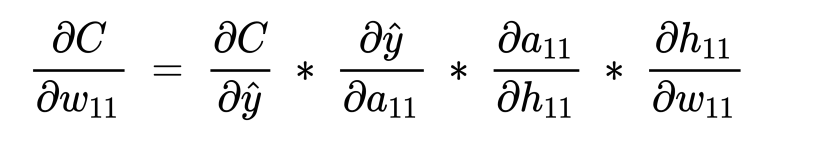

So by deriving the equation we can get that:

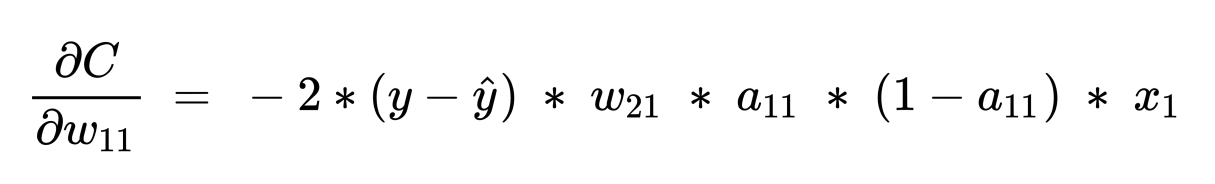

In [15]:
pre_hidden = np.dot(x,W[0])+ W[1]
hidden = 1/(1+np.exp(-pre_hidden))
predicted_value = np.dot(hidden, W[2]) + W[3]
print(predicted_value)

[[-0.0174781]]


So this the mathematical representation of chain rule for W:
`(-2*(0-(predicted_value[0][0]))*(W[2][0][0])*hidden[0,0]*(1-hidden[0,0])*x[0][0])`

In [16]:
#Temporary (tmp) represents as the update for the weight parameter in this "epoch," where the crazy ahh equation below is gradient
tmp = W[0][0][0] - (-2*(0-(predicted_value[0][0]))*(W[2][0][0])*hidden[0,0]*(1-hidden[0,0])*x[0][0])
print(tmp, updated_weights[0][0][0])

0.01714772428889734 0.01424295
